<a href="https://colab.research.google.com/github/hardsoft-maker/Theoretical_Mechanics/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from dataclasses import dataclass
from typing import List
import numpy as np
from sympy import symbols, Eq, solve
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.patches as patches
import math
FPS = 15  # increase to make animation slower
t_start = 0
t_end = 4
frames = int((t_end - t_start) * FPS)
phi_start = 130*np.pi/180
def time(t):
    return  t/FPS
delta = 0.00000001
#def avel(t):
#  return (apos(t) - apos(t + delta))/delta
O1A = 15
OP = 25
AB = 40
BC = 16
BO2 = 30
CO2 = 30
CD = 60
O3D = 50
w = 2*np.pi


In [4]:
import math

def circle_intersection(x1, y1, r1, x2, y2, r2):
    # Calculate the distance between the circle centers
    d = math.sqrt((x2 - x1) **  2 + (y2 - y1) **  2)

    # Check if the circles intersect
    if d > r1 + r2 or d < abs(r1 - r2):
        # No intersection
        return None

    # Calculate the a parameter
    a = (r1 **  2 - r2 **  2 + d **  2) / (2 * d)

    # Calculate the h parameter
    h = math.sqrt(r1 **  2 - a **  2)

    # Calculate the x coordinates of the intersection points
    x3 = x1 + a * (x2 - x1) / d
    x4 = x3 - h * (y2 - y1) / d
    x5 = x3 + h * (y2 - y1) / d

    # Calculate the y coordinates of the intersection points
    y3 = y1 + a * (y2 - y1) / d
    y4 = y3 - h * (x2 - x1) / d
    y5 = y3 + h * (x2 - x1) / d

    return [(x4, y5), (x5, y4)]

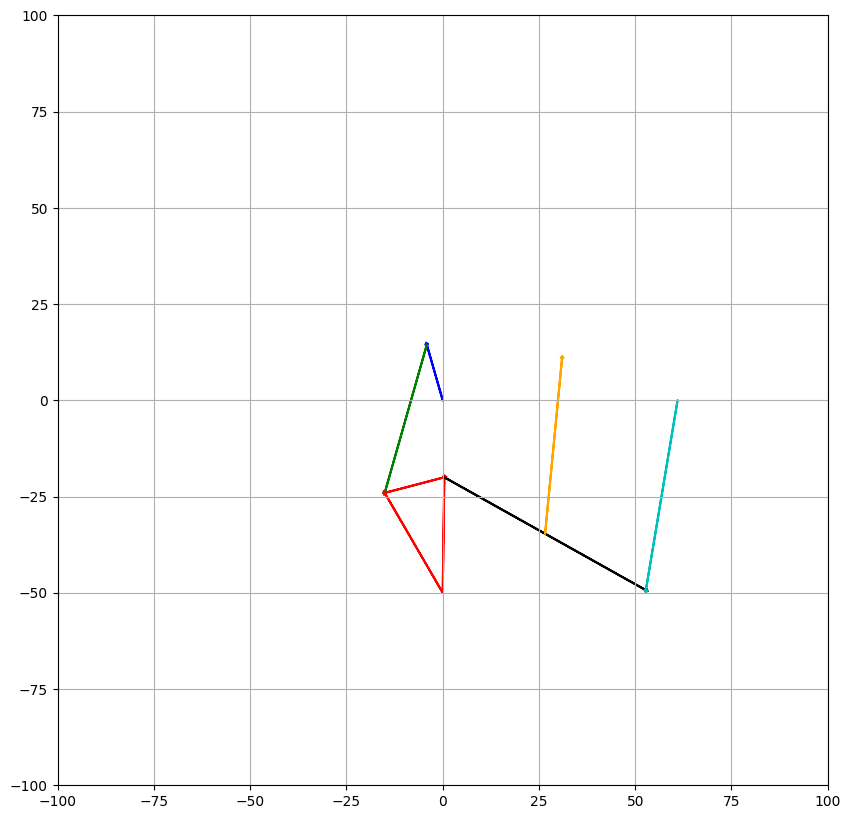

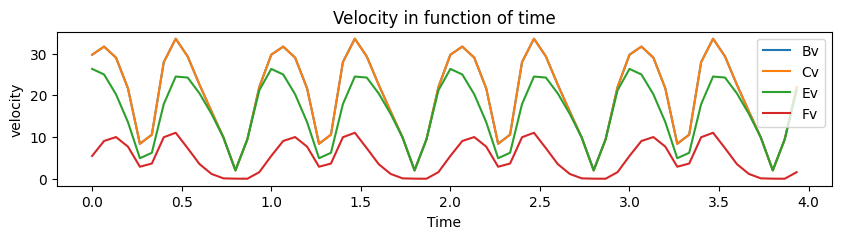

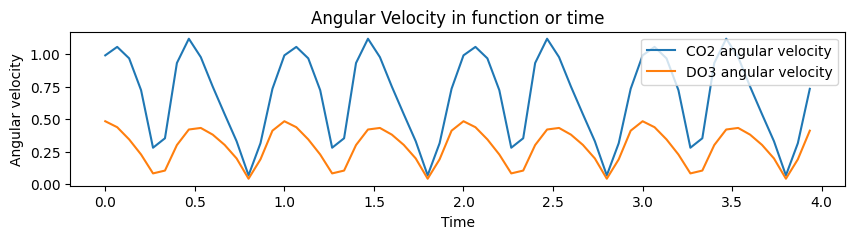

In [8]:
Bv_values = []
Cv_values = []
Ev_values = []
Fv_values = []
CDangularv_values = []
CO2angularv_values = []
DO3angularv_values = []

time_values = []
@dataclass
class SystemTrace:
    time: float
    @property
    def apos(self):
        return np.array(
            [
                O1A * np.cos(w*self.time + phi_start),
                O1A * np.sin(w*self.time + phi_start),
            ]
        )
    @property
    def appos(self):
        return np.array(
            [
                O1A * np.cos(w*(self.time + delta/FPS) + phi_start),
                O1A * np.sin(w*(self.time + delta/FPS) + phi_start),
            ]
        )
    @property
    def bpos(self):
        a = self.apos
        xo = 0
        yo = -50
        result = circle_intersection(a[0],a[1],AB,xo,yo,BO2)
        if(result[0][0] < result[1][0]):
          return np.array(result[0])
        return np.array(result[1])
    @property
    def bppos(self):
      aa= self.appos
      xo = 0
      yo = -50
      result = circle_intersection(aa[0],aa[1],AB,xo,yo,BO2)
      if(result[0][0] < result[1][0]):
          return np.array(result[0])
      return np.array(result[1])
    @property
    def cpos(self):
        b = self.bpos
        angel = math.acos((30**2 + 30**2 - 16**2) / (2 * 30 * 30))
        return np.array(
            [
                math.cos(-angel) * (b[0]) - math.sin(-angel) *(b[1]+50),
                -50 + math.sin(-angel) * (b[0]) + math.cos(-angel) * (b[1] + 50),
            ]
        )
    @property
    def cppos(self):
        bb = self.bppos
        angel = math.acos((30**2 + 30**2 - 16**2) / (2 * 30 * 30))
        return np.array(
            [
                math.cos(-angel) * (bb[0]) - math.sin(-angel) *(bb[1]+50),
                -50 + math.sin(-angel) * (bb[0]) + math.cos(-angel) * (bb[1] + 50),
            ]
        )
    @property
    def dpos(self):
      c = self.cpos
      xo = 61
      yo = 0
      result = circle_intersection(c[0],c[1],60,xo,yo,50)
      if(result[0][0] > result[1][0]):
          return np.array(result[0])
      return np.array(result[1])
    @property
    def dppos(self):
      cc = self.cppos
      xo = 61
      yo = 0
      result = circle_intersection(cc[0],cc[1],60,xo,yo,50)
      if(result[0][0] > result[1][0]):
          return np.array(result[0])
      return np.array(result[1])
    @property
    def epos(self):
      c,d = self.cpos, self.dpos
      return np.array(
            [
                (float(c[0])+d[0])/2,
                (float(c[1])+d[1])/2,
            ]
      )
    @property
    def eppos(self):
      cc,dd = self.cppos, self.dppos
      return np.array(
            [
                (float(cc[0])+dd[0])/2,
                (float(cc[1])+dd[1])/2,
            ]
      )
    @property
    def fpos(self):
      e = self.epos
      bb = (-2) * e[1]
      cc = (1-e[0]) * (61-e[0])
      discrim = bb**2 - 4*cc
      root1 = (-bb + math.sqrt(discrim)) / 2
      root2 = (-bb - math.sqrt(discrim)) / 2
      return np.array(
        [
            31,
            root1,
        ]
      )
    @property
    def fppos(self):
      ee = self.eppos
      bb = (-2) * ee[1]
      cc = (1-ee[0]) * (61-ee[0])
      discrim = bb**2 - 4*cc
      root1 = (-bb + math.sqrt(discrim)) / 2
      root2 = (-bb - math.sqrt(discrim)) / 2
      return np.array(
        [
            31,
            root1,
        ]
      )
traces: List[SystemTrace] = []
fig, ax = plt.subplots(figsize=(10, 10))
fig2, ax2 = plt.subplots(figsize=(10, 2))
fig3, ax3 = plt.subplots(figsize=(10, 2))

def update_static_plot():
    global Av_values, Bv_values, Cv_values, Ev_values, Fv_values, time_values, CDangular, CO2angularv_values, DO3angularv_values
    # Calculate the latest values for Av, Bv, etc.
    # Assume 'latest_trace' is the latest SystemTrace object
    latest_trace = traces[-1]
    Bv = (math.sqrt(((latest_trace.bppos[1]-latest_trace.bpos[1])*FPS/delta)**2 +((latest_trace.bppos[0]-latest_trace.bpos[0])*FPS/delta)**2) )/np.pi
    Cv = (math.sqrt(((latest_trace.cppos[1]-latest_trace.cpos[1])*FPS/delta)**2 +((latest_trace.cppos[0]-latest_trace.cpos[0])*FPS/delta)**2) )/np.pi
    Ev = (math.sqrt(((latest_trace.eppos[1]-latest_trace.epos[1])*FPS/delta)**2 +((latest_trace.eppos[0]-latest_trace.epos[0])*FPS/delta)**2) )/np.pi
    Dv = (math.sqrt(((latest_trace.dppos[1]-latest_trace.dpos[1])*FPS/delta)**2 +((latest_trace.dppos[0]-latest_trace.dpos[0])*FPS/delta)**2) )/np.pi
    Fv = (math.sqrt(((latest_trace.fppos[1]-latest_trace.fpos[1])*FPS/delta)**2 +((latest_trace.fppos[0]-latest_trace.fpos[0])*FPS/delta)**2) )/np.pi

    Bv_values.append(Bv)
    Cv_values.append(Cv)
    Ev_values.append(Ev)
    Fv_values.append(Fv)

    CO2angularv_values.append(Cv/CO2)
    DO3angularv_values.append(Dv/O3D)
    time_values.append(latest_trace.time)
    # Clear the previous plot
    ax2.clear()
    ax3.clear()
    # Plot the latest values
    ax2.plot(time_values, Bv_values, label='Bv')
    ax2.plot(time_values, Cv_values, label='Cv')
    ax2.plot(time_values, Ev_values, label='Ev')
    ax2.plot(time_values, Fv_values, label='Fv')

    ax3.plot(time_values, CO2angularv_values,label='CO2 angular velocity')
    ax3.plot(time_values, DO3angularv_values,label='DO3 angular velocity')
    # Set title and labels
    ax2.set_title('Velocity in function of time')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('velocity')
    ax2.legend()
    ax3.set_title('Angular Velocity in function or time')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('Angular velocity')
    ax3.legend()
ax.set(xlim=(-100, 100), ylim=(-100, 100))
ax.set_aspect("equal")
ax.grid()
p = SystemTrace(0)
point_OA = ax.arrow(
    0,
    0,
    p.apos[0],
    p.apos[1],
    head_width=0.9,
    head_length=0.5,
    color="b",
    lw=1.5,
)
point_AB = ax.arrow(
    p.apos[0],
    p.apos[1],
    float(p.bpos[0] - p.apos[0]),
    float(p.bpos[1] - p.apos[1]),
    head_width=0.9,
    head_length=0.5,
    color="green",
    lw=1.5,
)
point_O2B = ax.arrow(
    0,
    -50,
    float(p.bpos[0]),
    float(p.bpos[1]+50),
    head_width=0.9,
    head_length=0.5,
    color="r",
    lw=1.5,
)
point_BC = ax.arrow(
    p.bpos[0],
    p.bpos[1],
    float(float(p.cpos[0]) - p.bpos[0]),
    float(float(p.cpos[1]) - p.bpos[1]),
    head_width=0.9,
    head_length=0.5,
    color="r",
    lw=1.5,
)
point_O2C = ax.arrow(
    0,
    -50,
    float(p.cpos[0]),
    float(p.cpos[1]+50),
    head_width=0.9,
    head_length=0.5,
    color="r",
    lw=1.5,
)
point_DC = ax.arrow(
    p.cpos[0],
    p.cpos[1],
    float(p.dpos[0]-p.cpos[0]),
    float(p.dpos[1]-p.cpos[1]),
    head_width=0.9,
    head_length=0.5,
    color="black",
    lw=1.5,
)
point_EF = ax.arrow(
    p.epos[0],
    p.epos[1],
    float(p.fpos[0]-p.epos[0]),
    float(p.fpos[1]-p.epos[1]),
    head_width=0.9,
    head_length=0.5,
    color="orange",
    lw=1.5,
)
point_O3D = ax.arrow(
    61,
    0,
    float(p.dpos[0]-61),
    float(p.dpos[1]),
    head_width=0.9,
    head_length=0.5,
    color="c",
    lw=1.5,
)
def animate(i):
    angle = time(i)
    traces.append(SystemTrace(angle))
    p = traces[-1]
    #here we drawing velocities
    update_static_plot()
    # here we draw lines to describe mechanism
    point_OA.set_data(x=0, dx=p.apos[0], y=0, dy=p.apos[1])
    point_AB.set_data(x=p.apos[0], dx=float(p.bpos[0] - p.apos[0]), y=p.apos[1], dy=float(p.bpos[1] - p.apos[1]))
    point_O2B.set_data(x=0,dx=p.bpos[0],y=-50,dy=p.bpos[1]+50)
    point_BC.set_data(x=p.bpos[0],dx=(p.cpos[0]) - p.bpos[0],y=p.bpos[1],dy=float(p.cpos[1]) - p.bpos[1])
    point_O2C.set_data(x=0,dx=p.cpos[0],y=-50,dy=p.cpos[1]+50)
    point_DC.set_data(x=p.cpos[0],dx=p.dpos[0]-p.cpos[0],y=p.cpos[1],dy=p.dpos[1]-p.cpos[1])
    point_EF.set_data(x=p.epos[0],dx=p.fpos[0]-p.epos[0],y=p.epos[1],dy=p.fpos[1]-p.epos[1])
    point_O3D.set_data(x=61,dx=p.dpos[0]-61,y=0,dy=p.dpos[1])
anim = FuncAnimation(fig, animate, interval=1, frames=frames)
plt.legend()
anim.save("motion_task1.gif")
plt.draw()
plt.show()